## Goal: Price Prediction of Airbnb rentals in Sydney based on Features 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
train = pd.read_csv('train.csv')
train.head()


,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,Sunny huge private room in Paddington,NaN,NaN,Maritzza,2015-08-06,"Sydney, New South Wales, Australia",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,t,2,0,2,0,NaN,$85.00
1,Gorgeous large 3 bedroom terrace house,Our house is perfect for families or small gro...,Whilst Camperdown and Newtown are really livel...,Liv,2010-12-08,"New South Wales, Australia",.,NaN,NaN,NaN,...,10.0,10.0,10.0,t,1,1,0,0,0.16,$400.00
2,1 BR Apt with great small terrace in Surry Hills,"Lovely 2 storey apartment in Surry Hills, one ...",NaN,Emanuele,2016-09-17,"Turin, Piedmont, Italy",NaN,NaN,NaN,NaN,...,10.0,10.0,9.0,t,1,1,0,0,0.05,$229.00
3,Modern Apartment Close to Everything,Fantastic brand new Apartment with Panoramic v...,Multicultural Parramatta combines a buzzing co...,Leah,2017-10-27,"Parramatta, New South Wales, Australia",NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,t,1,0,1,0,0.05,$220.00
4,Charming parkside apartment in quiet area,How many holiday rentals allow you to walk out...,"Twenty minutes to the west of the Sydney CBD, ...",MadeComfy,2019-07-24,"Sydney, New South Wales, Australia","Hi, and welcome to MadeComfy!\n\nWe are a team...",NaN,NaN,NaN,...,10.0,10.0,8.0,t,189,189,0,0,0.90,$127.00


# DATA PRE-PROCESSING

In [4]:
#dropping neighbourhood_group_cleansed as it is an empty variable
train.drop(['neighbourhood_group_cleansed'], axis =1, inplace = True)

## 1. Changing the non-standard formats

In [5]:
#Changing price column format
train['price']=train['price'].str.strip('$')
train['price']=train['price'].str.replace(',','').astype(float)

In [6]:
#datetime format for host_since, and creating host_days as it will be a better variable to use
train['host_since']= pd.to_datetime(train['host_since'])
train['host_days']=(train['host_since'].max()-train['host_since']).dt.days

In [7]:
#datetime format for first_review 
train['first_review']=pd.to_datetime(train['first_review'])

#datetime format for last_review 
train['last_review']=pd.to_datetime(train['last_review'])


In [8]:
#host_acceptance rate and host_response rate format change
train['host_response_rate']= train['host_response_rate'].str.replace('%','').astype(float)/100
train['host_acceptance_rate']= train['host_acceptance_rate'].str.replace('%','').astype(float)/100


## 2. Seperating Columns by type

In [9]:
train_datetime = train.select_dtypes(include='datetime64')
train_categorical = train.select_dtypes(include='object')
train_discrete = train.select_dtypes(include='int64')
train_continuous = train.select_dtypes(include='float64')

## 3. Missing Values

### Imputation with Sklearn

#### 3.1 Handling Missing value in continuous variables 

<AxesSubplot:>

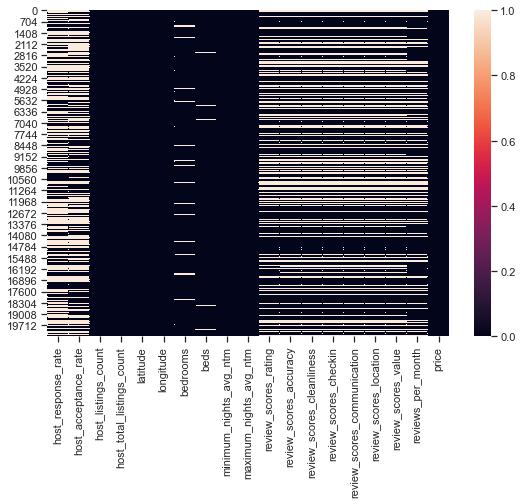

In [10]:
plt.rcParams['figure.figsize'] = (9, 6)
sns.heatmap(train_continuous.isnull())

In [11]:
from sklearn.impute import KNNImputer
#Using Multivariate KNN imputer 

In [12]:
#continuous variables 
impute_knn = KNNImputer()
d = impute_knn.fit_transform(train_continuous)

In [13]:
continuous_features = pd.DataFrame(d, columns = train_continuous.columns)

In [14]:
continuous_features.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
0,1.000,0.600,3.0,3.0,-33.88600,151.22138,1.0,1.0,3.0,3.0,96.8,9.8,9.6,10.0,10.0,10.0,9.8,0.732,85.0
1,0.800,0.488,1.0,1.0,-33.89147,151.17989,3.0,3.0,5.0,8.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.160,400.0
2,1.000,0.900,1.0,1.0,-33.88238,151.21147,1.0,1.0,2.0,1125.0,100.0,10.0,9.0,9.0,10.0,10.0,9.0,0.050,229.0
3,0.934,0.970,1.0,1.0,-33.81528,151.00074,1.0,1.0,365.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.050,220.0
4,0.800,0.584,0.0,0.0,-33.88649,151.13558,2.0,2.0,3.0,1125.0,83.0,9.0,8.0,10.0,10.0,10.0,8.0,0.900,127.0


<AxesSubplot:>

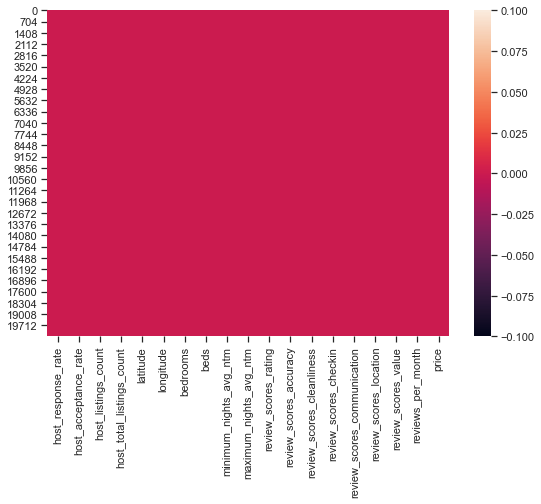

In [15]:
plt.rcParams['figure.figsize'] = (9, 6)
sns.heatmap(continuous_features.isnull())

#### 3.2 Handling Missing Values in Discrete Variables

In [16]:
train_discrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20408 entries, 0 to 20407
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   accommodates                                  20408 non-null  int64
 1   minimum_nights                                20408 non-null  int64
 2   maximum_nights                                20408 non-null  int64
 3   minimum_minimum_nights                        20408 non-null  int64
 4   maximum_minimum_nights                        20408 non-null  int64
 5   minimum_maximum_nights                        20408 non-null  int64
 6   maximum_maximum_nights                        20408 non-null  int64
 7   availability_30                               20408 non-null  int64
 8   availability_60                               20408 non-null  int64
 9   availability_90                               20408 non-null  int64
 10  availabili

#### 3.3 Handling Missing Values in categorical Variables

In [17]:
#dropping variables that are unnecessary and does not impact the Price of an Airbnb listing
train_categorical.drop(['host_name', 'host_about', 'neighborhood_overview'], axis =1, inplace = True)

In [18]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20408 entries, 0 to 20407
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    20408 non-null  object
 1   description             19751 non-null  object
 2   host_location           20384 non-null  object
 3   host_response_time      8385 non-null   object
 4   host_is_superhost       20408 non-null  object
 5   host_neighbourhood      12756 non-null  object
 6   host_verifications      20408 non-null  object
 7   host_identity_verified  20408 non-null  object
 8   neighbourhood           12538 non-null  object
 9   neighbourhood_cleansed  20408 non-null  object
 10  property_type           20408 non-null  object
 11  room_type               20408 non-null  object
 12  bathrooms_text          20393 non-null  object
 13  amenities               20408 non-null  object
 14  has_availability        20408 non-null  object
 15  in

In [19]:
#Here, the values for the dropped variables can be found in neighbourhood_cleansed column
train_categorical.drop(['host_neighbourhood', 'neighbourhood'], axis =1, inplace = True)

In [20]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20408 entries, 0 to 20407
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    20408 non-null  object
 1   description             19751 non-null  object
 2   host_location           20384 non-null  object
 3   host_response_time      8385 non-null   object
 4   host_is_superhost       20408 non-null  object
 5   host_verifications      20408 non-null  object
 6   host_identity_verified  20408 non-null  object
 7   neighbourhood_cleansed  20408 non-null  object
 8   property_type           20408 non-null  object
 9   room_type               20408 non-null  object
 10  bathrooms_text          20393 non-null  object
 11  amenities               20408 non-null  object
 12  has_availability        20408 non-null  object
 13  instant_bookable        20408 non-null  object
dtypes: object(14)
memory usage: 2.2+ MB


In [21]:
train_categorical['host_response_time']=train_categorical['host_response_time'].fillna('None')
train_categorical['description']=train_categorical['description'].fillna('None')

In [22]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20408 entries, 0 to 20407
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    20408 non-null  object
 1   description             20408 non-null  object
 2   host_location           20384 non-null  object
 3   host_response_time      20408 non-null  object
 4   host_is_superhost       20408 non-null  object
 5   host_verifications      20408 non-null  object
 6   host_identity_verified  20408 non-null  object
 7   neighbourhood_cleansed  20408 non-null  object
 8   property_type           20408 non-null  object
 9   room_type               20408 non-null  object
 10  bathrooms_text          20393 non-null  object
 11  amenities               20408 non-null  object
 12  has_availability        20408 non-null  object
 13  instant_bookable        20408 non-null  object
dtypes: object(14)
memory usage: 2.2+ MB


In [41]:
#concatinating all the columns after adding missing values, some values will be imputed for caregorical variables
#during feature engineering phase 
df = pd.concat([continuous_features, train_discrete, train_categorical, train_datetime], axis =1)
df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,instant_bookable,host_since,first_review,last_review
0,1.000,0.600,3.0,3.0,-33.88600,151.22138,1.0,1.0,3.0,3.0,...,Sydney,Private room in house,Private room,1 shared bath,"[""Washer"", ""Iron"", ""Hot water"", ""Essentials"", ...",t,t,2015-08-06,NaT,NaT
1,0.800,0.488,1.0,1.0,-33.89147,151.17989,3.0,3.0,5.0,8.0,...,Sydney,Entire house,Entire home/apt,3.5 baths,"[""Patio or balcony"", ""Garden or backyard"", ""Lo...",t,t,2010-12-08,2018-07-13,2020-01-01
2,1.000,0.900,1.0,1.0,-33.88238,151.21147,1.0,1.0,2.0,1125.0,...,Sydney,Entire apartment,Entire home/apt,1 bath,"[""Washer"", ""Long term stays allowed"", ""Microwa...",t,t,2016-09-17,2018-01-04,2018-03-18
3,0.934,0.970,1.0,1.0,-33.81528,151.00074,1.0,1.0,365.0,1125.0,...,Parramatta,Private room in apartment,Private room,1 private bath,"[""Washer"", ""Iron"", ""Long term stays allowed"", ...",t,t,2017-10-27,2017-12-02,2017-12-07
4,0.800,0.584,0.0,0.0,-33.88649,151.13558,2.0,2.0,3.0,1125.0,...,Ashfield,Entire apartment,Entire home/apt,1 bath,"[""Patio or balcony"", ""Bed linens"", ""Shampoo"", ...",t,t,2019-07-24,2019-11-01,2020-12-10


# Feature Engineering

### Encoding Categorical Variables 

In [42]:
df.select_dtypes(include='object').head()

,name,description,host_location,host_response_time,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,instant_bookable
0,Sunny huge private room in Paddington,None,"Sydney, New South Wales, Australia",None,f,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Sydney,Private room in house,Private room,1 shared bath,"[""Washer"", ""Iron"", ""Hot water"", ""Essentials"", ...",t,t
1,Gorgeous large 3 bedroom terrace house,Our house is perfect for families or small gro...,"New South Wales, Australia",None,f,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Sydney,Entire house,Entire home/apt,3.5 baths,"[""Patio or balcony"", ""Garden or backyard"", ""Lo...",t,t
2,1 BR Apt with great small terrace in Surry Hills,"Lovely 2 storey apartment in Surry Hills, one ...","Turin, Piedmont, Italy",None,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,Sydney,Entire apartment,Entire home/apt,1 bath,"[""Washer"", ""Long term stays allowed"", ""Microwa...",t,t
3,Modern Apartment Close to Everything,Fantastic brand new Apartment with Panoramic v...,"Parramatta, New South Wales, Australia",None,f,"['email', 'phone', 'reviews', 'offline_governm...",t,Parramatta,Private room in apartment,Private room,1 private bath,"[""Washer"", ""Iron"", ""Long term stays allowed"", ...",t,t
4,Charming parkside apartment in quiet area,How many holiday rentals allow you to walk out...,"Sydney, New South Wales, Australia",None,f,"['email', 'phone', 'work_email']",f,Ashfield,Entire apartment,Entire home/apt,1 bath,"[""Patio or balcony"", ""Bed linens"", ""Shampoo"", ...",t,t


In [43]:
#dummy variables for Binary features
df = pd.concat([df, pd.get_dummies(df['has_availability'],prefix='has_availability',drop_first=True),
                pd.get_dummies(df['host_is_superhost'],prefix='host_is_superhost',drop_first=True),
                pd.get_dummies(df['instant_bookable'],prefix='has_availability',drop_first=True),
                pd.get_dummies(df['host_identity_verified'],prefix='has_availability',drop_first=True),
                pd.get_dummies(df['room_type'],drop_first=True)], axis =1)

In [44]:
df.drop(['has_availability', 'host_is_superhost', 'instant_bookable', 'host_identity_verified', 'room_type'], 
        axis = 1, inplace = True)


In [45]:
# following columns have very high cardinality
df.drop(['name', 'description','host_location'], axis =1, inplace = True)

In [46]:
#High cardinality features
sparse_cats = df.property_type.value_counts().head(4).index.tolist() + ['other_property_type']
df['property_type'] = pd.Categorical(df['property_type'], categories=sparse_cats).fillna('other_property_type')
    

In [47]:
df['property_type'].value_counts()

Entire apartment             8867
Entire house                 3337
other_property_type          3273
Private room in apartment    3127
Private room in house        1804
Name: property_type, dtype: int64

In [48]:
df = pd.concat([df, pd.get_dummies(df['property_type'],drop_first=True)], axis =1)


In [49]:
df.drop(['property_type'], axis =1, inplace = True)

In [50]:
df = df.join(pd.get_dummies(df['host_response_time'],drop_first=True))

In [51]:
!mamba install -c conda-forge category_encoders -y


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.4.2) supported by @QuantStack

        GitHub:  https://github.com/QuantStack/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████

pkgs/main/noarch         [>                   ] (--:--) No change
pkgs/main/noarch         [====================]

In [52]:
from category_encoders.glmm import GLMMEncoder 

predictor = ['neighbourhood_cleansed']
y_train=df['price']   
encoder = GLMMEncoder().fit(df[predictor], y_train) 
df['neighbourhood_cleansedGL'] = encoder.transform(df[predictor])


In [53]:
df.drop(['neighbourhood_cleansed', 'host_verifications'], axis =1, inplace = True)

In [54]:
df['bathrooms_text'] = df['bathrooms_text'].astype(str).apply(lambda x:x.split()[0])
df.loc[~df['bathrooms_text'].str.replace('.','').str.isdigit(),['bathrooms_text']] = 0.5
df['bathrooms_text']=df['bathrooms_text'].astype(float)


In [77]:
df['first_review'].unique()

array([                          'NaT', '2018-07-13T00:00:00.000000000',
       '2018-01-04T00:00:00.000000000', ...,
       '2013-07-09T00:00:00.000000000', '2013-08-13T00:00:00.000000000',
       '2014-06-12T00:00:00.000000000'], dtype='datetime64[ns]')

## Simple Linear Regression Model

### Feature selection for Simple Linear regression model

In [62]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

In [68]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV